#### In this notebook, we generated just one single set of data and fit multiple distributions to the data and will test goodness of fit to confirm the best fit. If our data is Poisson, we expect to have Poisson fit as the best fit compare to other distribution fits.

In [47]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import chisquare
import DistFit.distfit_v1 as dft
from scipy.stats import chi2

In [53]:
row_count=10000

def data_generation(dist_type, par, row_count):
    if dist_type== 'normal':
        mean, std = par
        data=np.random.normal(mean, std, row_count)
    
    elif dist_type== 'geometric':
        p= par
        data=np.random.geometric(p, row_count)  
       
    elif dist_type== 'binomial':
        n, p= par
        data=np.random.binomial(n, p, row_count)
    
    elif dist_type == 'poisson':
        l= par
        data = np.random.poisson(l, row_count)    
    
    elif dist_type== 'exponential':
        scale= par
        data=np.random.exponential(scale, row_count)
   
    elif dist_type == 'gamma':
        shape , scale = par
        data=np.random.gamma(shape, scale, row_count)
    
    elif dist_type == 'weibull': 
        a, b = par 
        # a= scale parameter b= shape 
        data=b*np.random.weibull(a, row_count) #this is one-parameter Weibull; for 2-D => multiply by b
    
    elif dist_type == 'uniform':
        a,b = par
        data = np.random.uniform(a, b, row_count)
        
    elif dist_type == 'bernoulli':
        a = par
        data = np.random.bernoulli(a, row_count)
    
    else:
        raise ValueError("Change distribution type or modify parameters")
        
    return data

row_count=10000

In [104]:
def gof_test(observed, expected):
    # Ensure the observed and expected arrays have the same length
    if len(observed) != len(expected):
        raise ValueError("Observed and expected arrays must have the same length.")
    
    # Calculate the chi-square statistic
    chi2_statistic = np.sum((observed - expected)**2 / expected)

    # Calculate degrees of freedom
    degrees_of_freedom = len(observed) - 1
    # Calculate p-value
    p_value = 1 - chi2.cdf(chi2_statistic, degrees_of_freedom)
    #print(f"Chi-square statistic: {chi2_statistic}")
    #print(f"P_Value: {p_value}")
    return chi2_statistic, p_value

In [111]:
def fit_and_test(data, fit_types, n_trials=70):
    # Initialize lists to store results
    fit_results = []

    # Iterate over fit types 
    for fit_type in fit_types:
        model = dft.Fitting(data)
        fit_function= getattr(model, f"{fit_type.lower()}_fit")
        if fit_type.lower() == 'binomial':
            observed_data, expected_data, params = fit_function(n_trials)
        else:
            observed_data, expected_data, params = fit_function()

        chi2_stat, p_val = gof_test(observed_data, expected_data)    
        fit_results.append({
                    'Fit Type': fit_type,
                    'Chi-square Statistic': chi2_stat,
                    'P-Value': p_val
                })
        #model.normal_plot(params)

    # Create a dataframe
    df_results = pd.DataFrame(fit_results)

    # Sort the dataframe by chi-square statistic
    df_results = df_results.sort_values(by='Chi-square Statistic')

    return df_results

# Examples Using Fitting Class

### 1) Generating Data

In [112]:
#data = data_generation('poisson', 10, row_count) #(1, 0.3)
data = data_generation('normal', (5,1), row_count)
#data = data_generation('binomial', (10, 0.7), row_count)


## Fitting Multiple Distribution Types and Return Results

In [113]:
fit_types = ['Binomial', 'Normal', 'Poisson' ,'Geometric', 'Gamma', 'Uniform', 'Exponential', 'Weibull', 'Bernoulli' ]  # Add more fit types as needed
result_df = fit_and_test(data, fit_types)
print(result_df)


Note: When estimating p with very rare events and a small n, using MLE estimator leads to p=0 which sometimes is unrealistic and undesirable. In such cases, use alternative estimators.


      Fit Type  Chi-square Statistic  P-Value
1       Normal          4.595981e+03      1.0
7      Weibull          5.111420e+03      1.0
5      Uniform          1.715355e+04      0.0
3    Geometric          5.179128e+04      0.0
8    Bernoulli          1.688157e+05      0.0
6  Exponential          4.290991e+05      0.0
4        Gamma          1.958531e+18      0.0
0     Binomial                   inf      0.0
2      Poisson                   inf      0.0


### Fitting multiple distributions to generated data without Fit and test function

### 1: Binomial Fit


Note: When estimating p with very rare events and a small n, using MLE estimator leads to p=0 which sometimes is unrealistic and undesirable. In such cases, use alternative estimators.




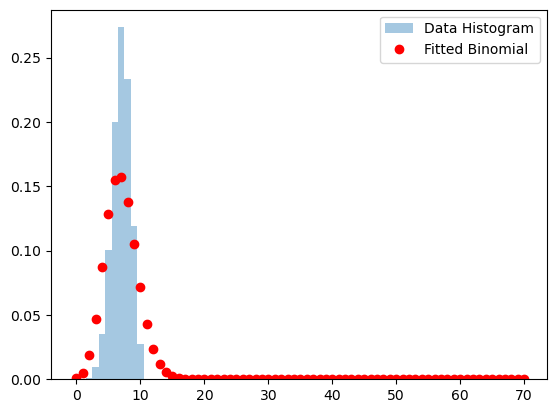

Chi-square statistic: inf
P_Value: 0.0


(inf, 0.0)

In [68]:
model = dft.Fitting(data)
n = 70  # replace with your actual number of trials
observed_data, expected_data, params = model.binomial_fit(n)
#print(observed_data, expected_data, params)
model.binomial_plot(params)
gof_test(observed_data, expected_data)

### 2: Normal Fit

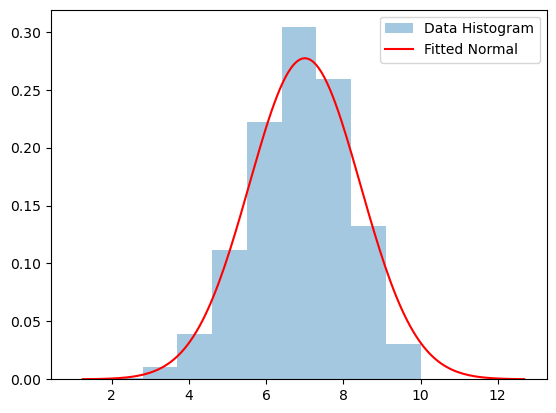

Chi-square statistic: 6569.089809151161
P_Value: 1.0


(6569.089809151161, 1.0)

In [69]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.normal_fit()
#print(observed_data, expected_data, params)
model.normal_plot(params)
gof_test(observed_data, expected_data)

### 3: Poisson Fit

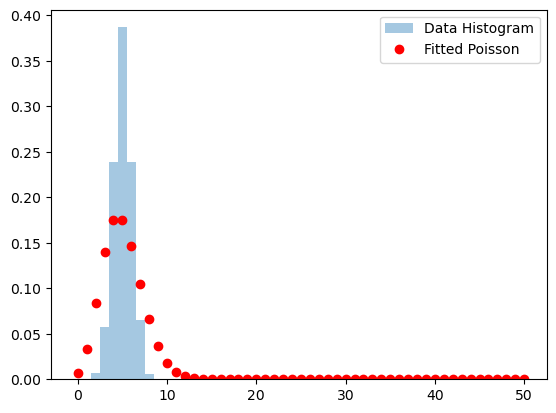

Chi-square statistic: inf
P_Value: 0.0


In [27]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.poisson_fit()
#print(observed_data, expected_data, params)
model.poisson_plot(params)
gof_test(observed_data, expected_data)

### 4: Geometric Fit

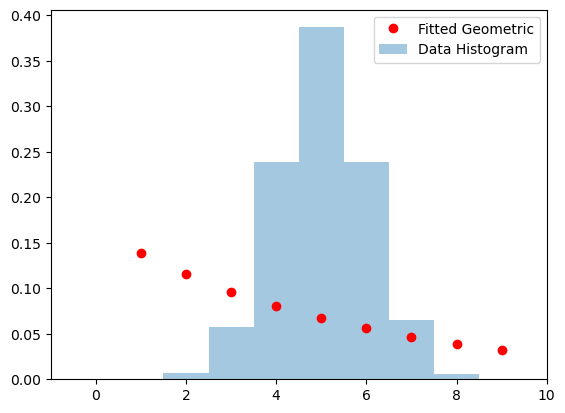

Chi-square statistic: 53895.09032067376
P_Value: 0.0


In [28]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.geometric_fit()
#print(observed_data, expected_data, params)
model.geometric_plot(params)
gof_test(observed_data, expected_data)

### 5: Uniform Fit

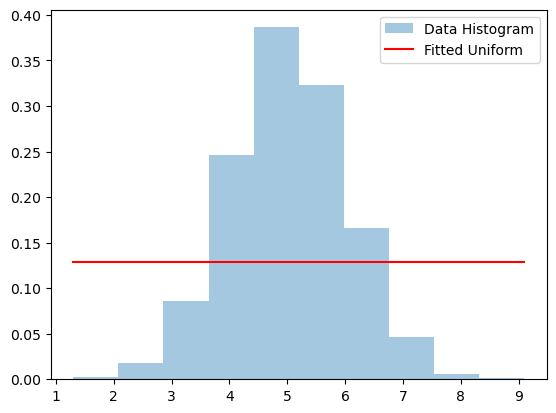

Chi-square statistic: 16372.946275024115
P_Value: 0.0


In [29]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.uniform_fit()
#print(observed_data, expected_data, params)
model.uniform_plot(params)
gof_test(observed_data, expected_data)

### 6: Exponential Fit

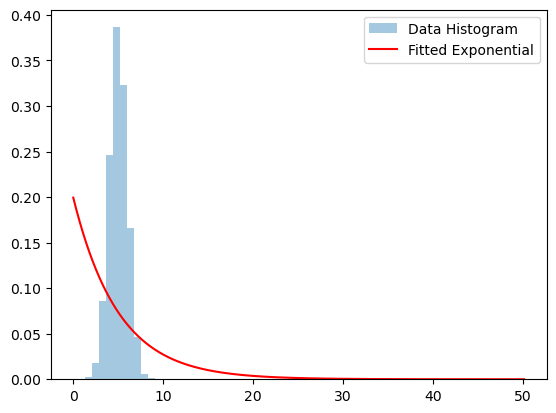

Chi-square statistic: 589714.3596912995
P_Value: 0.0


In [30]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.exponential_fit()
#print(observed_data, expected_data, params)
model.exponential_plot(params)
gof_test(observed_data, expected_data)

### 7: Weibull Fit

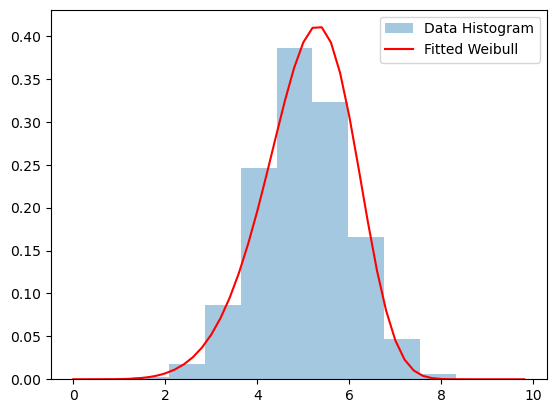

Chi-square statistic: 5086.464280069893
P_Value: 1.0


In [31]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.weibull_fit()
#print(observed_data, expected_data, params)
model.weibull_plot(params)
gof_test(observed_data, expected_data)

### 8: Gamma Fit

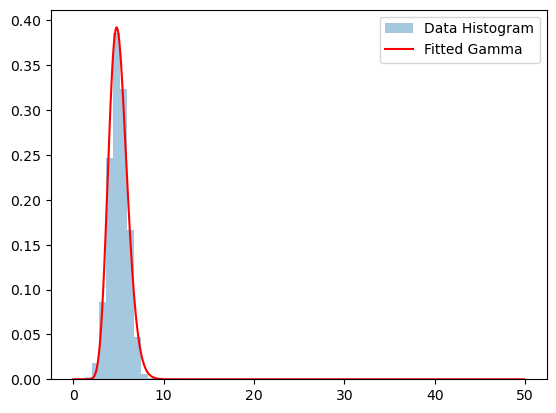

Chi-square statistic: 1.2122885558369142e+18
P_Value: 0.0


In [32]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.gamma_fit()
#print(observed_data, expected_data, params)
model.gamma_plot(params)
gof_test(observed_data, expected_data)

### 9: Bernoulli

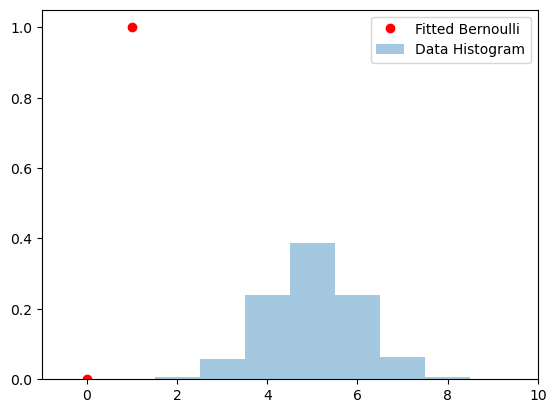

Chi-square statistic: 171259.3027129386
P_Value: 0.0


In [33]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.bernoulli_fit()
#print(observed_data, expected_data, params)
model.bernoulli_plot(params)
gof_test(observed_data, expected_data)